In [1]:
import time
from math import factorial
import threading
from multiprocessing import Process, set_start_method
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
def timer(func):
    """Decorator to time the execution of a function."""
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        execution_time = time.time() - start_time
        return execution_time
    return wrapper

In [3]:
class FactorialProcessor:
    """Handles factorial computations in different execution modes."""
    
    def __init__(self, data):
        self.data = data

    @staticmethod
    def compute_factorial(n):
        """Compute the factorial of a number."""
        return factorial(n)

    @timer
    def singlethread_execution(self):
        """Compute factorials using a single thread."""
        for value in self.data:
            self.compute_factorial(value)

    @timer
    def multithread_execution(self):
        """Compute factorials using multiple threads."""
        threads = [threading.Thread(target=self.compute_factorial, args=(value,)) for value in self.data]
        
        for thread in threads:
            thread.start()

        for thread in threads:
            thread.join()

    @timer
    def multiprocess_execution(self):
        """Compute factorials using multiple processes."""
        processes = [Process(target=self.compute_factorial, args=(value,)) for value in self.data]
        
        for process in processes:
            process.start()
            
        for process in processes:
            process.join()

In [4]:
def run_experiments(processor, n_runs):
    """Run each execution mode multiple times and collect execution times."""
    single_thread_times = []
    multi_thread_times = []
    multi_process_times = []

    for _ in range(n_runs):
        single_thread_times.append(processor.singlethread_execution())
        multi_thread_times.append(processor.multithread_execution())
        multi_process_times.append(processor.multiprocess_execution())

    avg_times = [
        round(np.mean(single_thread_times),2),
        round(np.mean(multi_thread_times),2),
        round(np.mean(multi_process_times),2)
    ]
    print(f"single thread avg: {avg_times[0]}s\nmulti thread avg: {avg_times[1]}s\nmulti processor avg: {avg_times[2]}s")
    return avg_times

def plot_results(avg_times):
    """Plot the average execution times for each execution mode."""
    import pandas as pd
    import seaborn as sns
    
    labels = ['Single Thread', 'Multi Thread', 'Multi Process']

    # Create a DataFrame for Seaborn
    data = pd.DataFrame({
        'Execution Mode': labels,
        'Average Execution Time (min)': avg_times
    })

    sns.set(style="darkgrid", context="talk")
    plt.figure(figsize=(6, 5))
    sns.barplot(
        x='Execution Mode',
        hue='Execution Mode',
        y='Average Execution Time (min)',
        data=data,
        palette=sns.color_palette("viridis", len(labels))
    )

    plt.title('Factorial Computation Performance Comparison', fontsize=18, weight='bold', pad=20)
    plt.ylabel('Average Execution Time (min)', fontsize=14, labelpad=10)
    plt.xlabel('Execution Mode', fontsize=14, labelpad=10)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    for index, row in data.iterrows():
        plt.text(
            x=index, 
            y=row['Average Execution Time (min)'] + 0.02, 
            s=f"{row['Average Execution Time (min)']:.2f}", 
            ha='center', fontsize=9, weight='bold'
        )

    plt.show()



Python version: 3.13.1 (main, Jan 21 2025, 23:46:16) [Clang 15.0.0 (clang-1500.3.9.4)]
GIL status: True
single thread avg: 2.32s
multi thread avg: 2.29s
multi processor avg: 0.51s


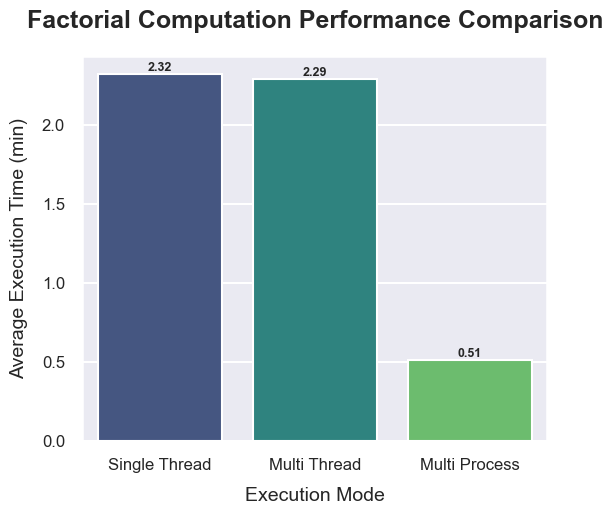

In [7]:
print(f"Python version: {sys.version}")
print(f"GIL status: {sys._is_gil_enabled()}")

# Experiment Configuration
factorial_number = 200000  # Factorial input size
n_workers = 5             # Number of computations to perform
n_runs = 30                # Number of repetitions per mode
data = [factorial_number] * n_workers

# Set the start method explicitly
set_start_method("fork", force=True)

processor = FactorialProcessor(data)

avg_times = run_experiments(processor, n_runs)

plot_results(avg_times)



Python version: 3.13.1+ experimental free-threading build (heads/3.13:0ddcb61ffea, Jan 21 2025, 23:50:26) [Clang 15.0.0 (clang-1500.3.9.4)]
GIL status: False
single thread avg: 2.24s
multi thread avg: 0.49s
multi processor avg: 0.51s


<frozen importlib._bootstrap>:488: RuntimeWarning: The global interpreter lock (GIL) has been enabled to load module 'pandas._libs.pandas_parser', which has not declared that it can run safely without the GIL. To override this behavior and keep the GIL disabled (at your own risk), run with PYTHON_GIL=0 or -Xgil=0.


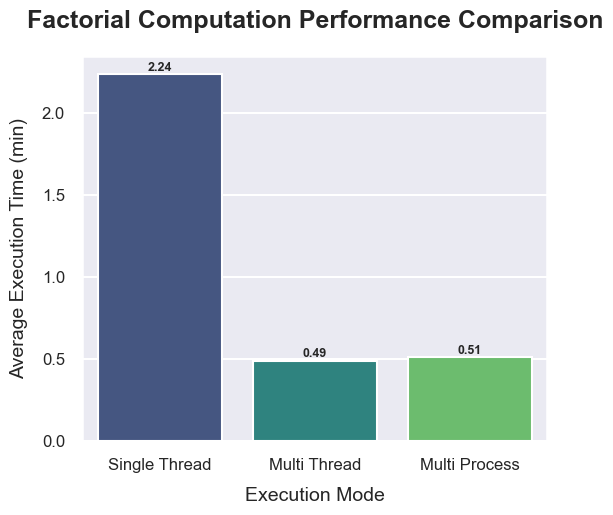

In [5]:
print(f"Python version: {sys.version}")
print(f"GIL status: {sys._is_gil_enabled()}")

# Experiment Configuration
factorial_number = 200000  # Factorial input size
n_workers = 5             # Number of computations to perform
n_runs = 30                # Number of repetitions per mode
data = [factorial_number] * n_workers

# Set the start method explicitly
set_start_method("fork", force=True)

processor = FactorialProcessor(data)

avg_times = run_experiments(processor, n_runs)

plot_results(avg_times)

